# Camunda 8 Workers:
## Power Consumption at Shutdown

*06.12.23, Author: Jan Wittrowski*

**Cheatsheet**

```df.loc[row, col]```

## Importing, Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read first CSV containing idle measurement 1-7
rawdata = pd.read_csv("CSV/stop_9_15_all_pods.csv", 
                     header=1, # which row contains column headers
                     index_col=0   ) # which column contains labels

rawdata

,bpmndeployment-8l9w6 / camunda8 / PKG,camunda-platform-connectors-7d745cc4cd-lk6h4 / camunda8 / PKG,camunda-platform-elasticsearch-master-0 / camunda8 / PKG,camunda-platform-elasticsearch-master-1 / camunda8 / PKG,camunda-platform-operate-745dd6ffbd-hd2s7 / camunda8 / PKG,camunda-platform-tasklist-595f9975f6-62bbr / camunda8 / PKG,camunda-platform-zeebe-0 / camunda8 / PKG,camunda-platform-zeebe-gateway-5b66c5dffb-5swg8 / camunda8 / PKG,console-worker-console-worker-chart-camunda-8-go-console-wfzxss / camunda8 / PKG,processstart-xb5jm / camunda8 / PKG,...,restworkerjava-bfdc4578f-mzz7l / worker / OTHER,restworkerjava-bfdc4578f-nkb2p / worker / OTHER,restworkerjava-bfdc4578f-q9dr7 / worker / OTHER,restworkerjava-bfdc4578f-rtq77 / worker / OTHER,restworkerjava-bfdc4578f-sdpj9 / worker / OTHER,restworkerjava-bfdc4578f-tt6xj / worker / OTHER,restworkerjava-bfdc4578f-wxcdh / worker / OTHER,restworkerjava-bfdc4578f-x8wgd / worker / OTHER,restworkerjava-bfdc4578f-xpqkf / worker / OTHER,restworkerjava-bfdc4578f-z2f4b / worker / OTHER
Time,,,,,,,,,,,,,,,,,,,,,
2023-12-06 15:05:00,0.0612,0.1240,0.177,0.200,0.0702,0.0921,2.45,0.339,0.0690,0.0612,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2023-12-06 15:05:10,0.0612,0.1090,0.261,0.221,0.1070,0.1220,3.27,0.369,0.0879,0.0612,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2023-12-06 15:05:20,0.0840,0.1150,0.301,0.275,0.1910,0.1020,4.13,0.514,0.0927,0.0840,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2023-12-06 15:05:30,0.0630,0.1060,0.200,0.191,0.0822,0.1610,2.70,0.464,0.0762,0.0630,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2023-12-06 15:05:40,0.0630,0.1270,0.256,0.242,0.0888,0.0855,2.44,0.497,0.0672,0.0630,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06 15:24:50,0.0912,0.2030,0.253,0.362,0.1980,0.1690,3.09,0.678,0.0972,0.0912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-06 15:25:00,0.0684,0.1160,0.217,0.250,0.1140,0.0888,2.68,0.360,0.0684,0.0684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-06 15:25:10,0.0684,0.0885,0.181,0.215,0.1040,0.0966,2.27,0.904,0.0684,0.0684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# remove irrelevant columns: 

columns_to_keep = rawdata.columns[~rawdata.columns.str.contains('OTHER|measuring-endpoints|monitoring|console-worker|tasklist|operate|bpmndeployment|processstart|elasticsearch')]
data = rawdata.loc[:, columns_to_keep]

columns_to_keep

Index(['camunda-platform-connectors-7d745cc4cd-lk6h4 / camunda8 / PKG',
       'camunda-platform-zeebe-0 / camunda8 / PKG',
       'camunda-platform-zeebe-gateway-5b66c5dffb-5swg8 / camunda8 / PKG',
       'coredns-77ccd57875-qkp4q / kube-system / PKG',
       'helm-install-traefik-crd-hzktt / kube-system / PKG',
       'helm-install-traefik-ncp5n / kube-system / PKG',
       'local-path-provisioner-957fdf8bc-jnlfw / kube-system / PKG',
       'metrics-server-648b5df564-msqlc / kube-system / PKG',
       'svclb-traefik-5671c552-795qx / kube-system / PKG',
       'traefik-768bdcdcdd-4f8ms / kube-system / PKG',
       'system_processes / system / PKG',
       'restworkerjava-bfdc4578f-7k6vp / worker / PKG',
       'restworkerjava-bfdc4578f-9bm2j / worker / PKG',
       'restworkerjava-bfdc4578f-d4fvn / worker / PKG',
       'restworkerjava-bfdc4578f-ftjrk / worker / PKG',
       'restworkerjava-bfdc4578f-h5crh / worker / PKG',
       'restworkerjava-bfdc4578f-h7c8k / worker / PKG',
     

## Stop

### Reihe 3

- start 9: 2023-12-06 15:05:00 replicas: 4 -> 3
- start 10: 2023-12-06 15:07:50 replicas: 3 -> 2
- start 11:2023-12-06 15:10:30 replicas: 2 -> 1
- start 12: 2023-12-06 15:13:09 replicas: 1 -> 0
- stop 12: 2023-12-06 15:15:20 
### Reihe 4

- start 13 2023-12-06 15:18:00 replicas: 16 -> 8
- start 14 2023-12-06 15:20:30 replicas: 8 -> 4
- start 15: 2023-12-06 15:23:00 replicas: 4 -> 0
- stop 15: 2023-12-06 15:25:30


In [6]:
# import start times from obsidian docs

start_times_single = [
    '2023-12-06 15:05:00',
    '2023-12-06 15:07:50',
    '2023-12-06 15:10:30',
    '2023-12-06 15:13:10'
]
start_times_multiple = [
    '2023-12-06 15:18:00',
    '2023-12-06 15:20:30',
    '2023-12-06 15:23:00'
]

start_times_single_info = [
    '4 -> 3',
    '3 -> 2',
    '2 -> 1',
    '1 -> 0'
]
start_times_multiple_info = [
    '16 -> 8',
    '8 -> 4',
    '4 -> 0'
]

In [7]:
# create dataframe for each start-measurement
worker_starts  = []

for time in start_times_single:
    index = data.index.get_loc(time)
    temp = data.iloc[index:index + 15,:]
    temp = temp.dropna(how='all', axis=1)
    worker_starts.append(temp)


In [8]:
# create namespace sums for workers

namespace_sum = []
namespaces = []

# read namespaces from columns. 
# This relies on grafana CSV-outputs using '/' as a divider: "pod / namespace / domain"
for col in data.columns:
    split_col = col.split('/')
    if len(split_col) > 1:
        if split_col[1] not in namespaces:
            namespaces.append(split_col[1].strip())

for worker in worker_starts:
    worker_sums = pd.DataFrame()

    for namespace in namespaces:
        namespace_cols = [col for col in worker.columns if namespace in col]

        worker_sums[namespace] = worker[namespace_cols].sum(axis=1)  

    namespace_sum.append(worker_sums)

namespace_sum[2]

,camunda8,kube-system,system,worker
Time,,,,
2023-12-06 15:10:30,3.4997,0.6860,1.7982,0.2288
2023-12-06 15:10:40,4.0075,0.6125,3.5975,0.1982
2023-12-06 15:10:50,4.9223,0.9233,3.0153,0.2574
2023-12-06 15:11:00,3.5608,0.7029,2.0459,0.2324
2023-12-06 15:11:10,3.6008,0.6857,2.3707,0.2267
2023-12-06 15:11:20,4.5242,0.8876,2.7746,0.1050
2023-12-06 15:11:30,3.4244,0.7142,2.4882,0.0858
2023-12-06 15:11:40,3.6290,0.6382,2.1592,0.0783
2023-12-06 15:11:50,4.3012,0.9054,3.0314,0.1402


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '00:10'),
  Text(1, 0, '00:20'),
  Text(2, 0, '00:30'),
  Text(3, 0, '00:40'),
  Text(4, 0, '00:50'),
  Text(5, 0, '01:00'),
  Text(6, 0, '01:10'),
  Text(7, 0, '01:20'),
  Text(8, 0, '01:30'),
  Text(9, 0, '01:40'),
  Text(10, 0, '01:50'),
  Text(11, 0, '02:00'),
  Text(12, 0, '02:10'),
  Text(13, 0, '02:20'),
  Text(14, 0, '02:30')])

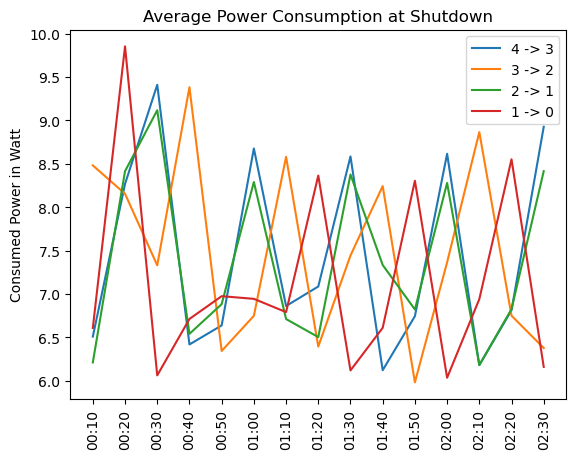

In [25]:
# create relative timestamps
elapsed_times = []
for i in range(1,16):
    s = i * 10 % 60
    m = int(i / 6)
    elapsed_times.append("{:02d}:{:02d}".format(m,s))


# plot time series
fig, ax = plt.subplots()

for series in namespace_sum:
  sums = series.sum(axis = 1)
  plt.plot(elapsed_times, sums)

ax.set_ylabel('Consumed Power in Watt')
ax.set_title('Average Power Consumption at Shutdown')
ax.legend(start_times_single_info)
plt.xticks(rotation='vertical')

*'3 -> 4' is the runaway*

In [10]:
# throw out measurement 4 "3 -> 4"
start_min_sum = namespace_sum[0:3] # upper boundary not included
second_min_sum =  namespace_sum[0:3]

# save first and second minute
for i, frame in enumerate(start_min_sum):
    start_min_sum[i] = frame.iloc[0:6,:]
    second_min_sum[i] = frame.iloc[6:12,:]

second_min_sum[0]

,camunda8,kube-system,system,worker
Time,,,,
2023-12-06 15:06:00,3.2691,0.6321,2.6921,0.2694
2023-12-06 15:06:10,3.5997,0.6638,2.5248,0.2993
2023-12-06 15:06:20,5.0301,0.7735,2.4245,0.3577
2023-12-06 15:06:30,2.9740,0.6176,2.2726,0.2589
2023-12-06 15:06:40,3.3189,0.6854,2.4934,0.2478
2023-12-06 15:06:50,4.2115,0.9216,3.0976,0.3859


## Energy Consumption in first Minute by Namespace

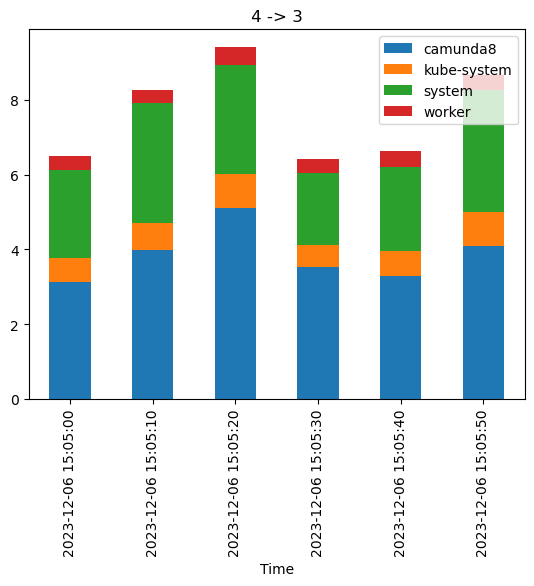

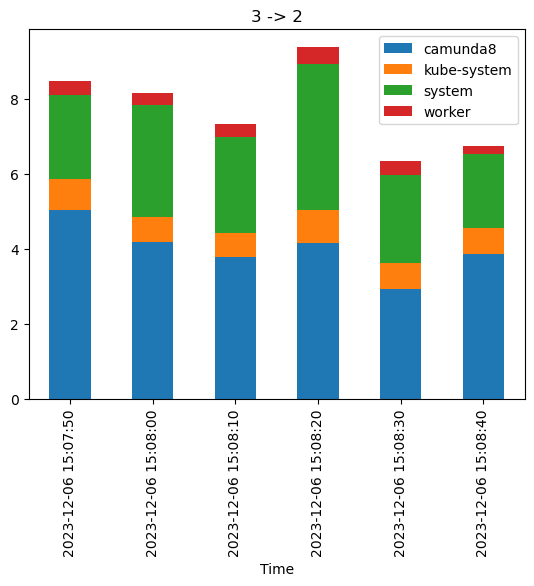

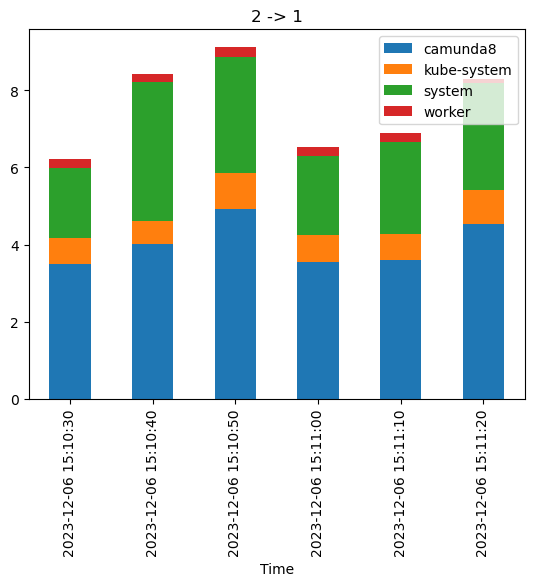

In [11]:
elapsed_times = []
for i in range(1,7):
    s = i * 10 % 60
    m = int(i / 6)
    elapsed_times.append("{:02d}:{:02d}".format(m,s))

for i, frame in enumerate(start_min_sum):
    plot = frame.plot(kind="bar", stacked="True", title=start_times_single_info[i])

### 1st minute average by namespace

In [12]:
average_start_by_namespace = pd.DataFrame()

for i, frame in enumerate(start_min_sum):

    average_start_by_namespace[start_times_single_info[i]] = frame.sum(axis=0)
    
average_start_by_namespace

,4 -> 3,3 -> 2,2 -> 1
camunda8,23.1350,23.9724,24.1153
kube-system,4.4516,4.4149,4.4980
system,15.8934,16.0065,15.6022
worker,2.4469,2.0532,1.2485


### 2nd minute average by namespace

In [13]:
average_second_min_by_namespace = pd.DataFrame()

for i, frame in enumerate(second_min_sum):

    average_second_min_by_namespace[start_times_single_info[i]] = frame.sum(axis=0)
    
average_second_min_by_namespace

,4 -> 3,3 -> 2,2 -> 1
camunda8,22.4033,21.7388,22.9792
kube-system,4.2940,4.6457,4.3419
system,15.5050,16.2593,16.0629
worker,1.8190,1.3723,0.6504


### Difference between 1st and 2nd minute

In [14]:
diff_in_minutes = average_start_by_namespace - average_second_min_by_namespace

diff_in_minutes

,4 -> 3,3 -> 2,2 -> 1
camunda8,0.7317,2.2336,1.1361
kube-system,0.1576,-0.2308,0.1561
system,0.3884,-0.2528,-0.4607
worker,0.6279,0.6809,0.5981


<Axes: title={'center': 'Stopping: Difference 1st Minute - 2nd Minute'}>

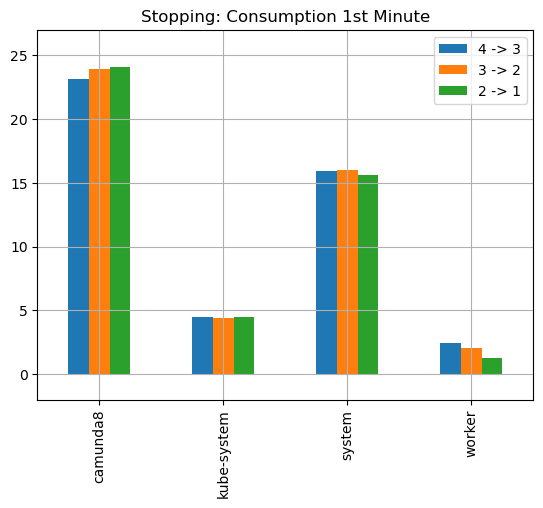

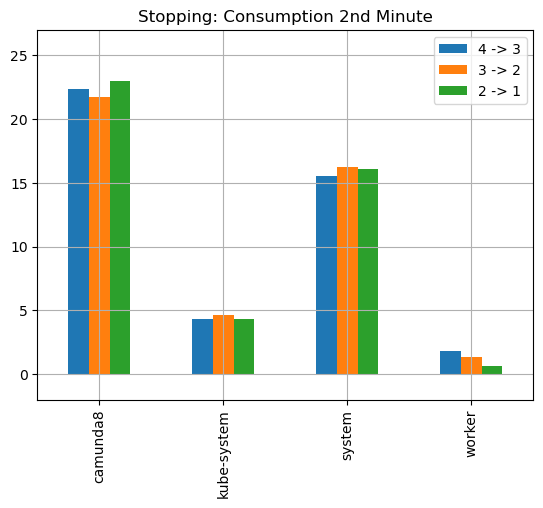

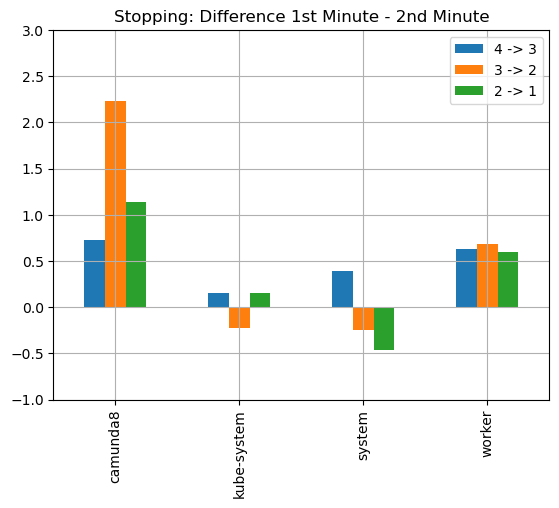

In [40]:
# create average difference
# series = diff_in_minutes.mean(axis=1)
# series.plot(kind="bar")

ylim = [ -2, 27 ]
ylim2 = [ -1, 3 ]

average_start_by_namespace.plot(kind="bar",
                                     title="Stopping: Consumption 1st Minute",
                                     grid=True,
                                     ylim=ylim
                                     )
average_second_min_by_namespace.plot(kind="bar",
                                     title="Stopping: Consumption 2nd Minute",
                                     grid=True,
                                     ylim=ylim
                                     )
diff_in_minutes.plot(kind="bar",
                                     title="Stopping: Difference 1st Minute - 2nd Minute",
                                     grid=True,
                                     ylim=ylim2
                                     )
                                    

In [43]:
sums = diff_in_minutes.mean(axis=0)

sums

4 -> 3    0.476400
3 -> 2    0.607725
2 -> 1    0.357400
dtype: float64

# Stopping multiple workers

The 2nd set of measurements involved starting multiple workers at one to see if the energy consumed would be proportional to starting individual pods 

In [16]:
# create dataframes for each first and second minute of starting

first_min_multiple = []
second_min_multiple = []

for time in start_times_multiple:
    start_index = data.index.get_loc(time)

    first_min_multiple.append(pd.DataFrame(data.iloc[start_index : start_index + 6,:]))
    second_min_multiple.append(pd.DataFrame(data.iloc[start_index + 6 : start_index + 12,:]))


In [17]:
# summing up all pods in namespace

first_min_multiple_by_namespaces =[]
second_min_multiple_by_namespaces =[]

# first minute
for worker in first_min_multiple:
    temp1 = pd.DataFrame()

    for namespace in namespaces:
        namespace_cols = [col for col in worker.columns if namespace in col]
        temp1[namespace] = worker[namespace_cols].sum(axis=1)  

    first_min_multiple_by_namespaces.append(temp1)

# second minute
for worker in second_min_multiple:
    temp2 = pd.DataFrame()

    for namespace in namespaces:
        namespace_cols = [col for col in worker.columns if namespace in col]
        temp2[namespace] = worker[namespace_cols].sum(axis=1)  

    second_min_multiple_by_namespaces.append(temp2)

second_min_multiple_by_namespaces[1]

,camunda8,kube-system,system,worker
Time,,,,
2023-12-06 15:21:30,3.7584,0.6473,2.2173,0.3279
2023-12-06 15:21:40,4.1134,0.5756,2.1266,0.3612
2023-12-06 15:21:50,4.1626,0.8416,3.1366,0.5785
2023-12-06 15:22:00,3.9516,0.7505,2.3255,0.3879
2023-12-06 15:22:10,3.6987,0.5882,2.4762,0.2892
2023-12-06 15:22:20,5.1134,0.8084,2.4164,0.4463


## Plotting Multiple Workers

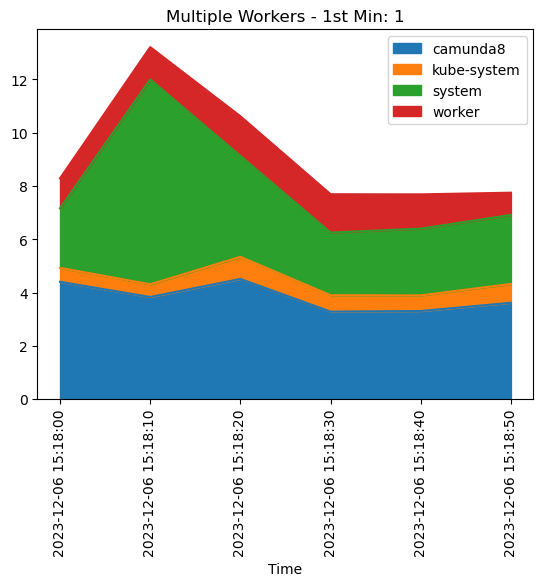

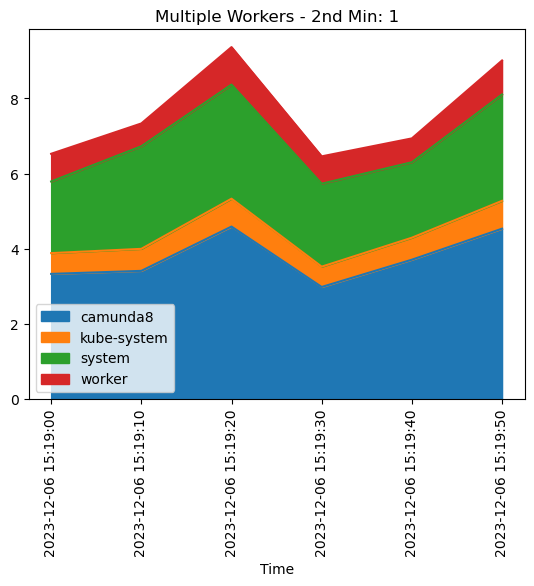

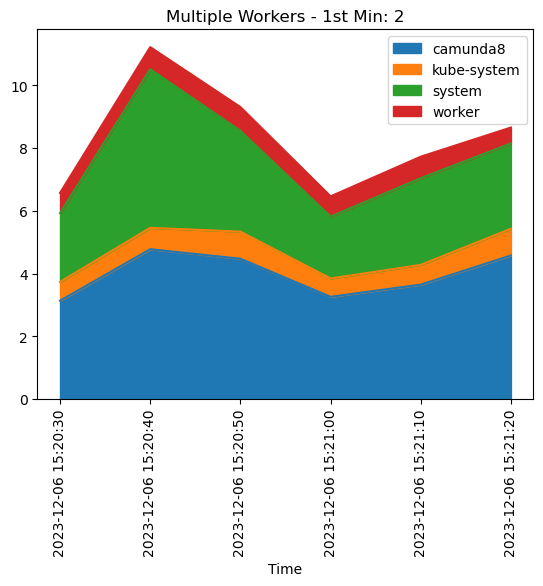

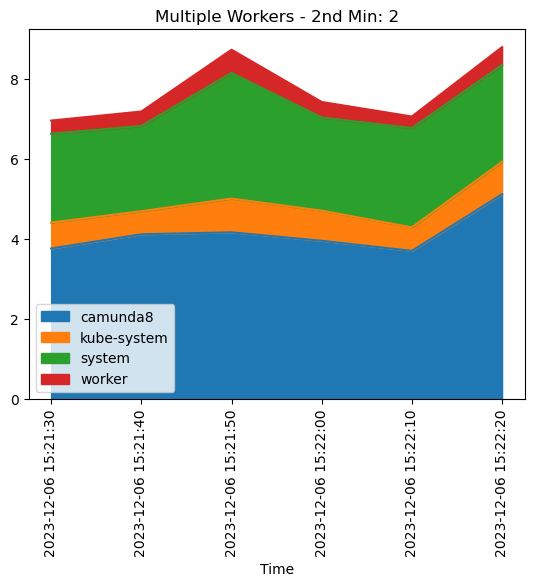

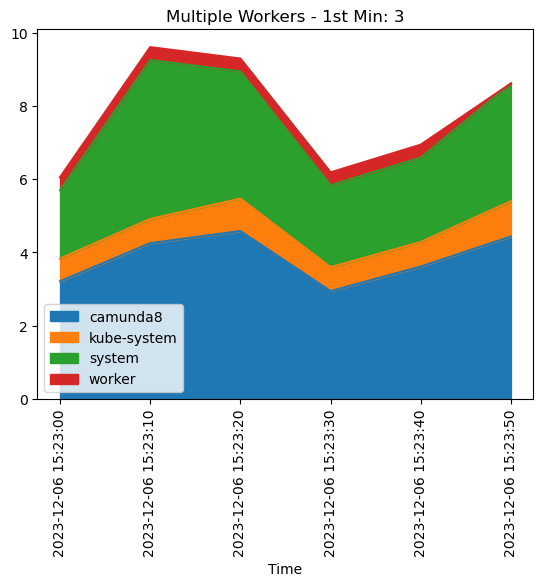

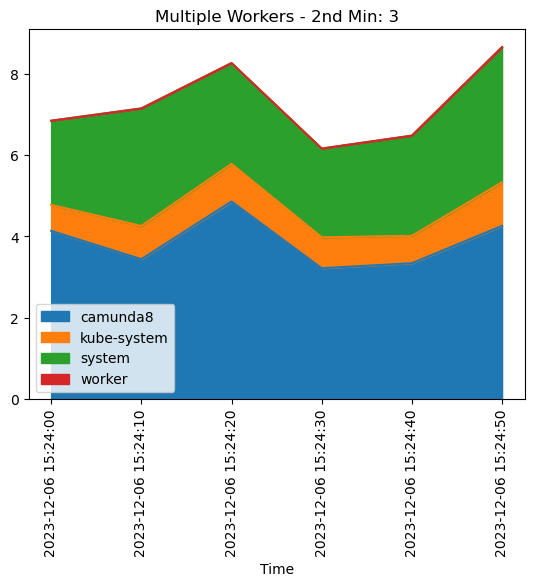

In [18]:
for i in range(0,3):
    first_min_multiple_by_namespaces[i].plot(kind="area", title="Multiple Workers - 1st Min: {}".format(i+1))
    plt.xticks(rotation="vertical")
    second_min_multiple_by_namespaces[i].plot(kind="area", title="Multiple Workers - 2nd Min: {}".format(i+1))
    plt.xticks(rotation="vertical")

### Starting multiple workers: Consumption per worker

In [19]:
# import (copy) info from obsidian

# number of started workers per measurement
second_min_multiple_by_namespaces_per_worker = []
first_min_multiple_by_namespaces_per_worker = []

how_many_started = [ 8, 4, 4]

for i in range(len(how_many_started)):
    second_min_multiple_by_namespaces_per_worker.append(second_min_multiple_by_namespaces[i] / how_many_started[i])
    first_min_multiple_by_namespaces_per_worker.append(first_min_multiple_by_namespaces[i] / how_many_started[i])



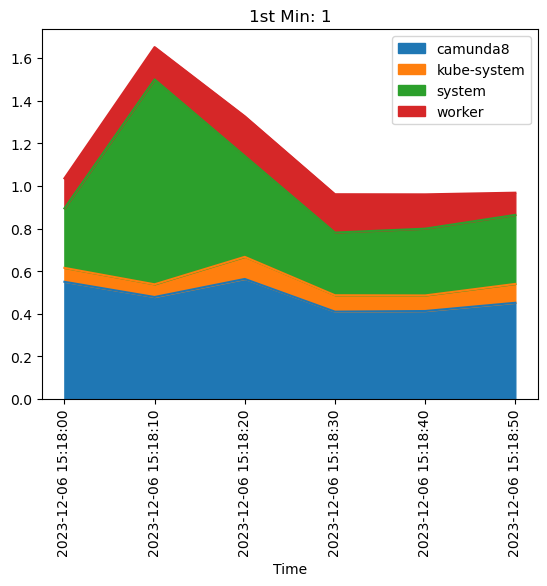

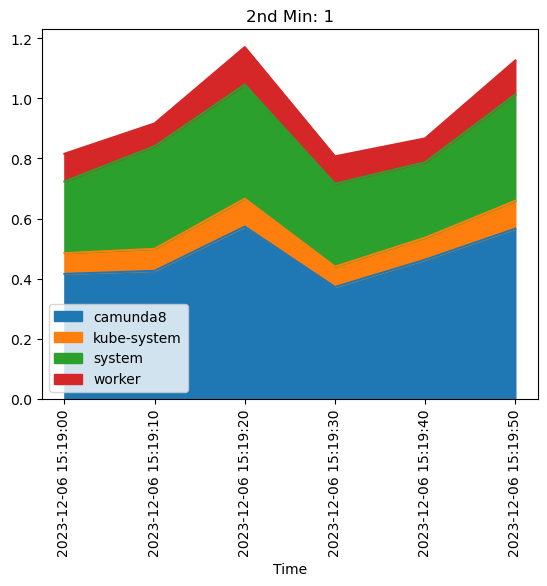

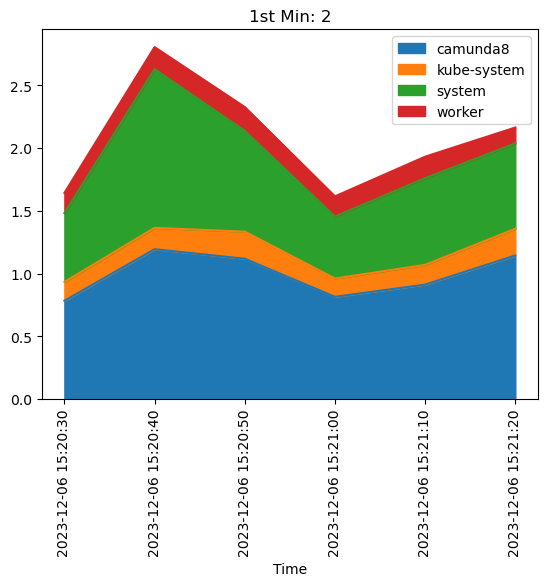

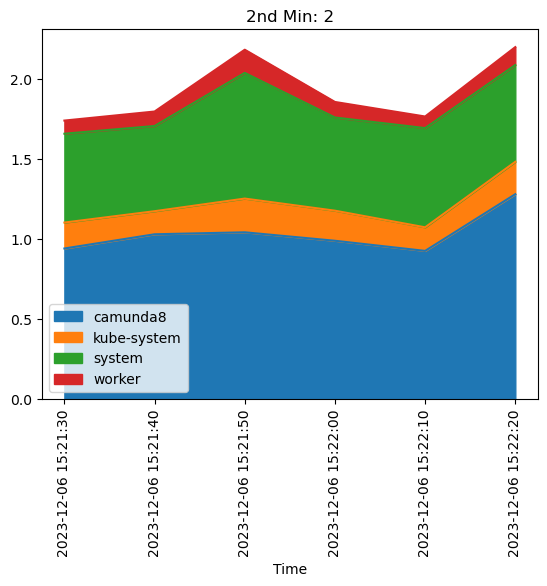

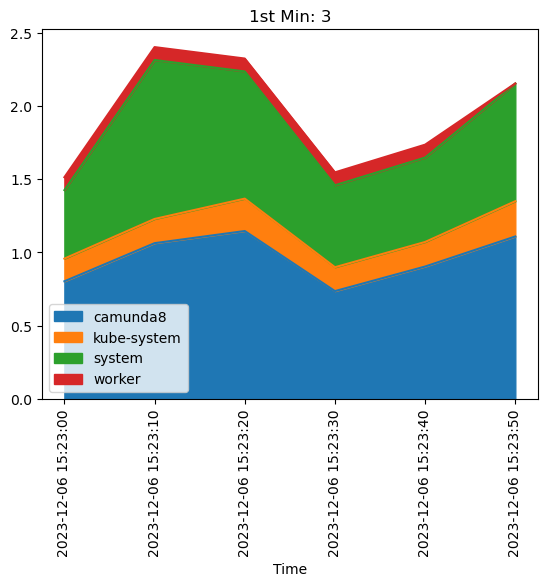

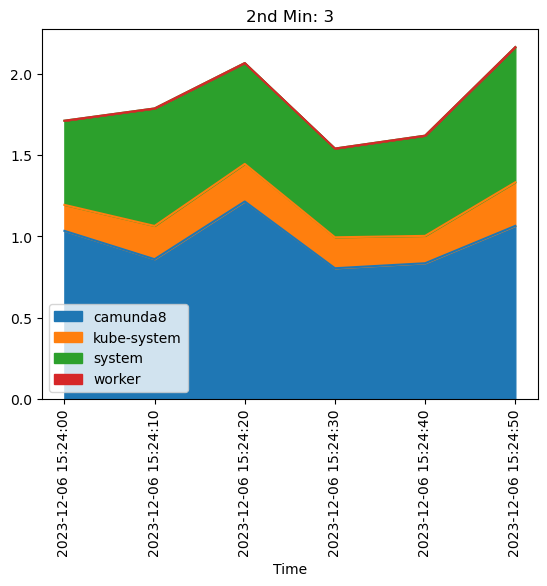

In [20]:
for i in range(0,3):
    first_min_multiple_by_namespaces_per_worker[i].plot(kind="area", title="1st Min: {}".format(i+1))
    plt.xticks(rotation="vertical")
    second_min_multiple_by_namespaces_per_worker[i].plot(kind="area", title="2nd Min: {}".format(i+1))
    plt.xticks(rotation="vertical")

## Multiple Workers: Evaluate per Minute

In [21]:
# create sum for first minute
first_minute_multiple_sum = pd.DataFrame()
first_minute_multiple_sum.style.set_caption("Watts consumed in first minute")

for i, frame in enumerate(first_min_multiple_by_namespaces):

    first_minute_multiple_sum[start_times_multiple_info[i]] = frame.sum(axis=0)
    

# create sum for second minute
second_minute_multiple_sum = pd.DataFrame()
second_minute_multiple_sum.style.set_caption("Watts consumed in second minute")

for i, frame in enumerate(second_min_multiple_by_namespaces):

    second_minute_multiple_sum[start_times_multiple_info[i]] = frame.sum(axis=0)
    

In [22]:
# create diff first min - second min

multiple_diff_in_minutes = first_minute_multiple_sum - second_minute_multiple_sum

multiple_diff_in_minutes_per_worker = pd.DataFrame()

for i, num in enumerate(how_many_started):
    multiple_diff_in_minutes_per_worker[start_times_multiple_info[i]] = multiple_diff_in_minutes.iloc[:,i] / num

In [23]:
display(first_minute_multiple_sum) # energy usage in first min
display(second_minute_multiple_sum) # energy usage in second min
display(multiple_diff_in_minutes_per_worker) # difference in energy usage min 1 to min 2

,16 -> 8,8 -> 4,4 -> 0
camunda8,22.9472,23.8729,23.0508
kube-system,3.7372,4.2061,4.4455
system,21.1612,17.9191,17.4269
worker,7.3885,3.9440,1.7595


,16 -> 8,8 -> 4,4 -> 0
camunda8,22.5539,24.7981,23.2613
kube-system,3.7454,4.2116,4.8870
system,14.7138,14.6986,15.4140
worker,4.6060,2.3910,0.0000


,16 -> 8,8 -> 4,4 -> 0
camunda8,0.049163,-0.231300,-0.052625
kube-system,-0.001025,-0.001375,-0.110375
system,0.805925,0.805125,0.503225
worker,0.347812,0.388250,0.439875


### Multiple Workers: Plotting per-minute-evaluation

<Axes: title={'center': 'Shutting Down: Difference 1st Min - 2nd Min'}>

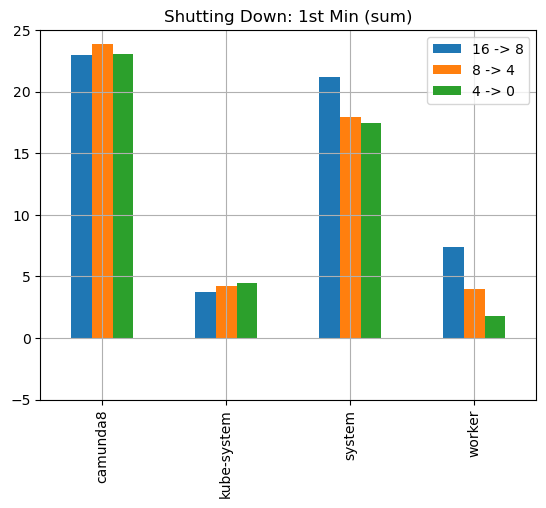

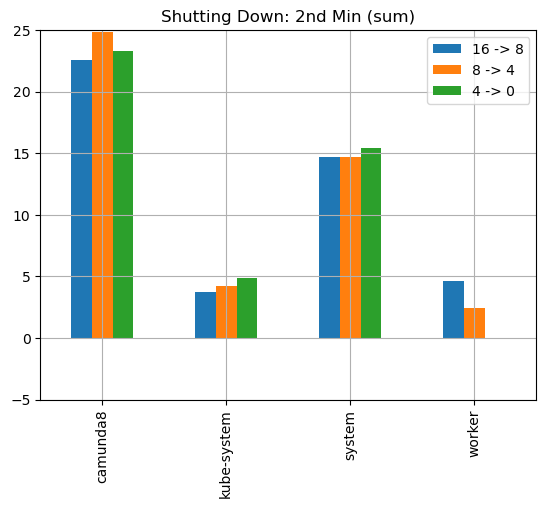

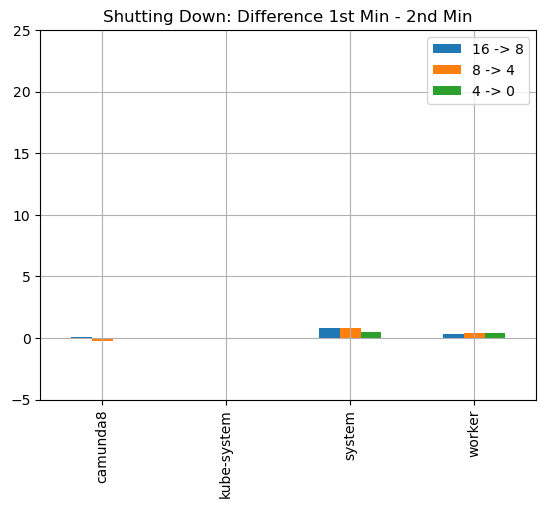

In [36]:
ylim = [ -5 , 25 ]

first_minute_multiple_sum.plot(kind="bar", 
                               title="Shutting Down: 1st Min (sum)", 
                               legend=True,
                               grid=True,
                               ylim=ylim
                               )
second_minute_multiple_sum.plot(kind="bar", 
                                title="Shutting Down: 2nd Min (sum)",
                                legend=True,
                                grid=True,
                                ylim=ylim
                                )
multiple_diff_in_minutes_per_worker.plot(kind="bar", 
                                         title="Shutting Down: Difference 1st Min - 2nd Min",
                                         legend=True,
                                         grid=True,
                                         ylim=ylim
                                         )